In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Malmi_office_building_hourly.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1848 non-null   object 
 1   ElCons                        1848 non-null   float64
 2   Heat                          1848 non-null   int64  
 3   Cloud amount (1/8)            1848 non-null   int64  
 4   Pressure (msl) (hPa)          1848 non-null   float64
 5   Relative humidity (%)         1848 non-null   int64  
 6   Air temperature (degC)        1848 non-null   float64
 7   Dew-point temperature (degC)  1848 non-null   float64
 8   Horizontal visibility (m)     1848 non-null   int64  
 9   Wind direction (deg)          1848 non-null   int64  
 10  Gust speed (m/s)              1848 non-null   float64
 11  Wind speed (m/s)              1848 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 173.4+ KB


In [5]:
df.head()

,Date,ElCons,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,01/01/2020 00:00,17.25,70,0,1011.5,90,-1.9,-3.3,18632,226,2.6,2.0
1,01/01/2020 01:00,17.21,70,0,1011.4,92,-2.1,-3.1,22284,237,2.9,2.1
2,01/01/2020 02:00,17.00,80,0,1010.9,87,-0.5,-2.5,50000,286,4.0,2.6
3,01/01/2020 03:00,17.22,70,0,1010.7,83,0.2,-2.4,48969,274,4.2,2.9
4,01/01/2020 04:00,17.09,70,3,1009.9,84,0.1,-2.2,49724,244,4.2,3.0


In [6]:
df.isnull().sum()

Date                            0
ElCons                          0
Heat                            0
Cloud amount (1/8)              0
Pressure (msl) (hPa)            0
Relative humidity (%)           0
Air temperature (degC)          0
Dew-point temperature (degC)    0
Horizontal visibility (m)       0
Wind direction (deg)            0
Gust speed (m/s)                0
Wind speed (m/s)                0
dtype: int64

Text(0.5, 1.0, 'Energy Consumption Distribution')

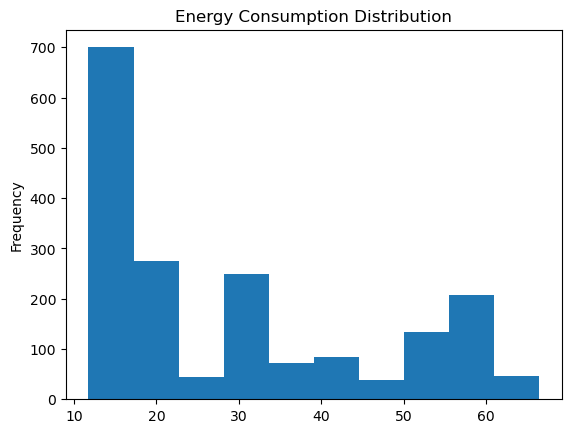

In [7]:
df['ElCons'].plot(kind='hist')
plt.title("Energy Consumption Distribution")

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df['day_name'] = df.reset_index()['Date'].dt.day_name()

In [11]:
df.head()

,ElCons,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),day_name
Date,,,,,,,,,,,,
2020-01-01 00:00:00,17.25,70,0,1011.5,90,-1.9,-3.3,18632,226,2.6,2.0,NaN
2020-01-01 01:00:00,17.21,70,0,1011.4,92,-2.1,-3.1,22284,237,2.9,2.1,NaN
2020-01-01 02:00:00,17.00,80,0,1010.9,87,-0.5,-2.5,50000,286,4.0,2.6,NaN
2020-01-01 03:00:00,17.22,70,0,1010.7,83,0.2,-2.4,48969,274,4.2,2.9,NaN
2020-01-01 04:00:00,17.09,70,3,1009.9,84,0.1,-2.2,49724,244,4.2,3.0,NaN


In [12]:
daily_consumption = df['ElCons'].resample('D').sum()

In [13]:
df.drop(['day_name'], axis=1, inplace=True)

In [14]:
daily_consumption = pd.DataFrame({'Date':daily_consumption.index, 'Elcons':daily_consumption.values})

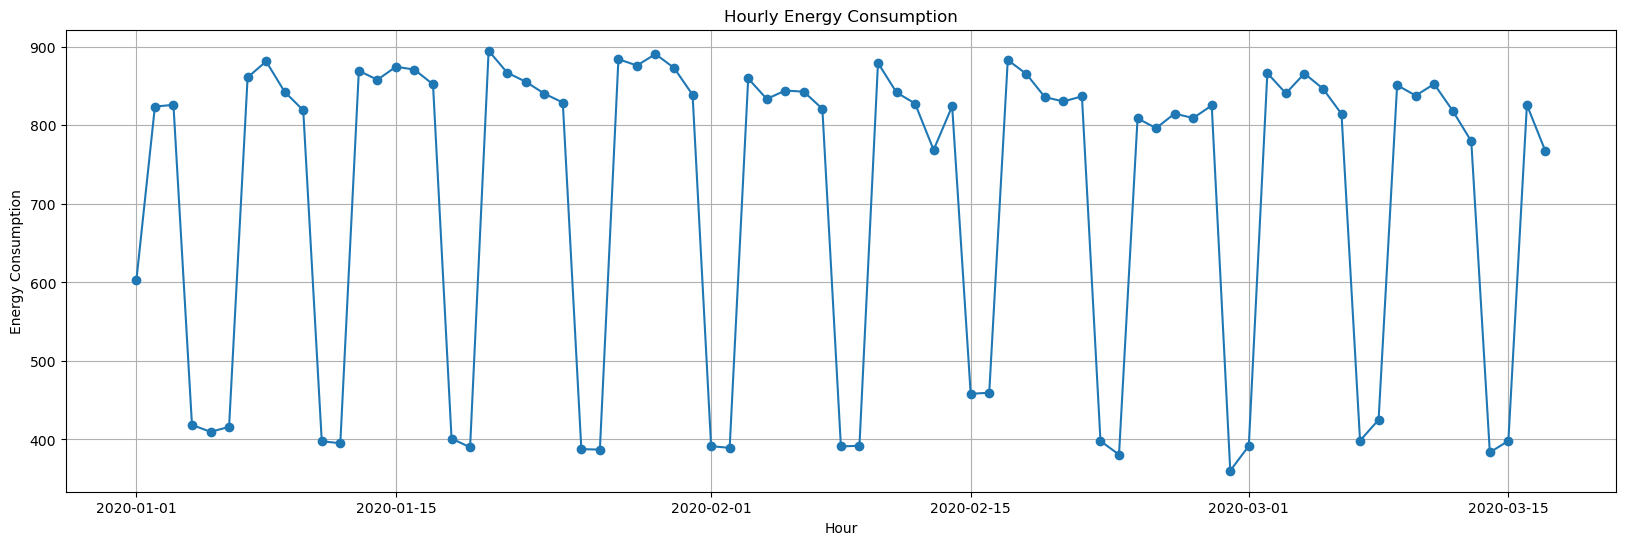

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(daily_consumption['Date'], daily_consumption['Elcons'], marker='o')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()

In [16]:
weekly = df['ElCons'].resample('W').sum()

In [17]:
weekly = pd.DataFrame({'Date':weekly.index, 'Elcons':weekly.values})

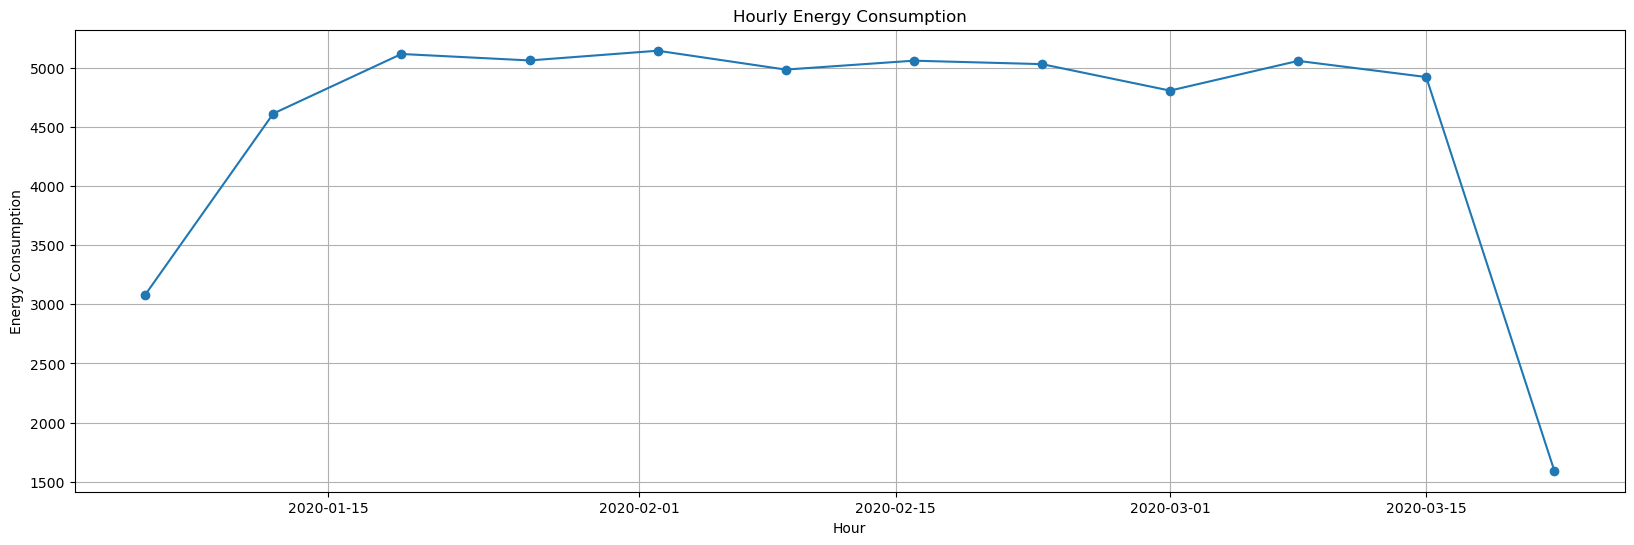

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(weekly['Date'], weekly['Elcons'], marker='o')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()

In [19]:
df.reset_index(inplace=True)

In [20]:
df['day_name'] = df['Date'].dt.day_name()
df.head()

,Date,ElCons,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),day_name
0,2020-01-01 00:00:00,17.25,70,0,1011.5,90,-1.9,-3.3,18632,226,2.6,2.0,Wednesday
1,2020-01-01 01:00:00,17.21,70,0,1011.4,92,-2.1,-3.1,22284,237,2.9,2.1,Wednesday
2,2020-01-01 02:00:00,17.00,80,0,1010.9,87,-0.5,-2.5,50000,286,4.0,2.6,Wednesday
3,2020-01-01 03:00:00,17.22,70,0,1010.7,83,0.2,-2.4,48969,274,4.2,2.9,Wednesday
4,2020-01-01 04:00:00,17.09,70,3,1009.9,84,0.1,-2.2,49724,244,4.2,3.0,Wednesday


In [21]:
df.set_index('Date', inplace=True)

In [22]:
days = df['day_name'].groupby(df.index.date).max()

In [23]:
daily = df['ElCons'].resample('D').sum()
daily_ = pd.DataFrame({'ElCons':daily.values, 'Day': days.values}, index=daily.index)
daily_

,ElCons,Day
Date,,
2020-01-01,602.65,Wednesday
2020-01-02,823.87,Thursday
2020-01-03,826.16,Friday
2020-01-04,418.48,Saturday
2020-01-05,409.73,Sunday
...,...,...
2020-03-13,779.70,Friday
2020-03-14,383.55,Saturday
2020-03-15,398.12,Sunday


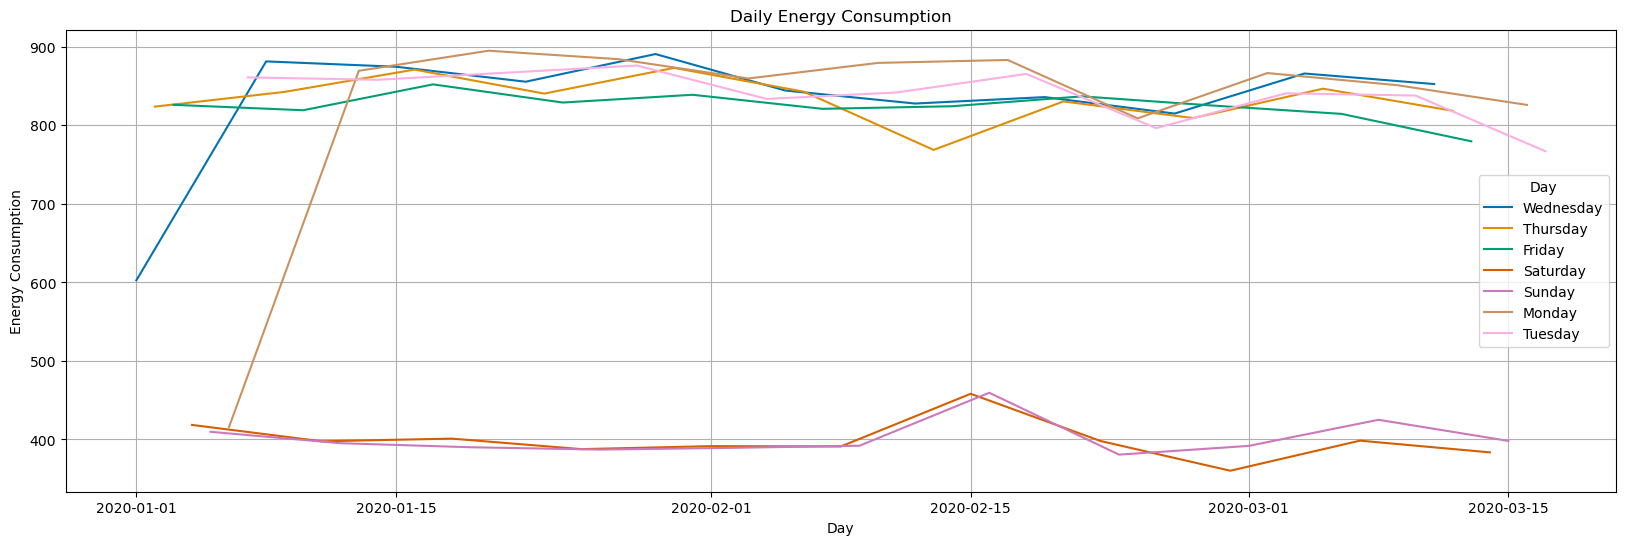

In [24]:
plt.figure(figsize=(20, 6))
sns.lineplot(data= daily_, x='Date', y='ElCons', hue='Day', palette="colorblind")
plt.title('Daily Energy Consumption')
plt.xlabel('Day')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()

In [25]:
total_day_usage = daily_.groupby('Day').sum()

In [26]:
total_day_usage

,ElCons
Day,
Friday,9067.61
Monday,9040.02
Saturday,4385.69
Sunday,4418.38
Thursday,9167.79
Tuesday,9245.62
Wednesday,9146.96


Text(0.5, 1.0, 'Total Energy Consumption on each Day in Office Building')

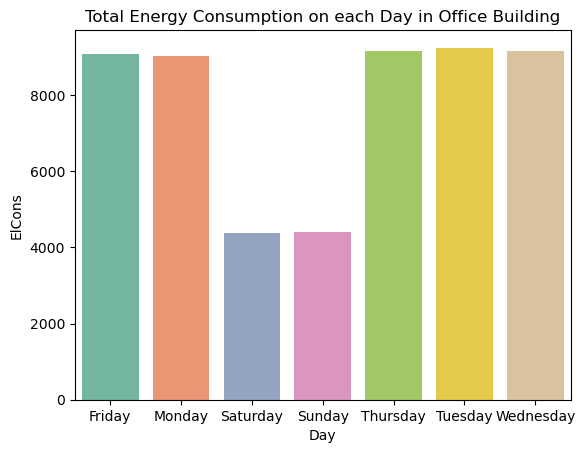

In [27]:
sns.barplot(data=total_day_usage, x='Day', y='ElCons', palette='Set2')
plt.title("Total Energy Consumption on each Day in Office Building")

In [28]:
df['Weekend'] = df['day_name'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0)

In [29]:
df['Weekend'].value_counts()

Weekend
0    1320
1     528
Name: count, dtype: int64

In [37]:
daily_weather = df.drop(['ElCons', 'day_name', 'Weekend'],axis=1).resample('D').mean()

In [38]:
daily_weather

,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
Date,,,,,,,,,,
2020-01-01,78.750000,4.500000,1007.995833,80.958333,1.654167,-1.275000,47225.833333,245.916667,5.216667,3.320833
2020-01-02,67.500000,4.375000,1003.412500,83.791667,3.916667,1.400000,29846.458333,233.416667,6.233333,3.808333
2020-01-03,59.583333,6.500000,994.612500,81.500000,4.658333,1.691667,24167.208333,231.125000,11.925000,7.179167
2020-01-04,67.083333,3.458333,990.008333,68.750000,1.841667,-3.350000,47189.125000,262.875000,8.170833,5.058333
2020-01-05,79.166667,4.375000,1015.816667,68.125000,-2.095833,-7.345833,36903.625000,263.916667,6.875000,4.529167
...,...,...,...,...,...,...,...,...,...,...
2020-03-13,69.166667,5.625000,990.237500,73.291667,0.841667,-3.683333,47871.375000,299.041667,7.854167,5.029167
2020-03-14,72.916667,1.250000,1011.620833,55.250000,-2.750000,-11.050000,49407.250000,314.500000,6.995833,4.625000
2020-03-15,62.500000,3.208333,1014.491667,71.541667,0.933333,-3.837500,40017.833333,198.166667,11.008333,6.787500


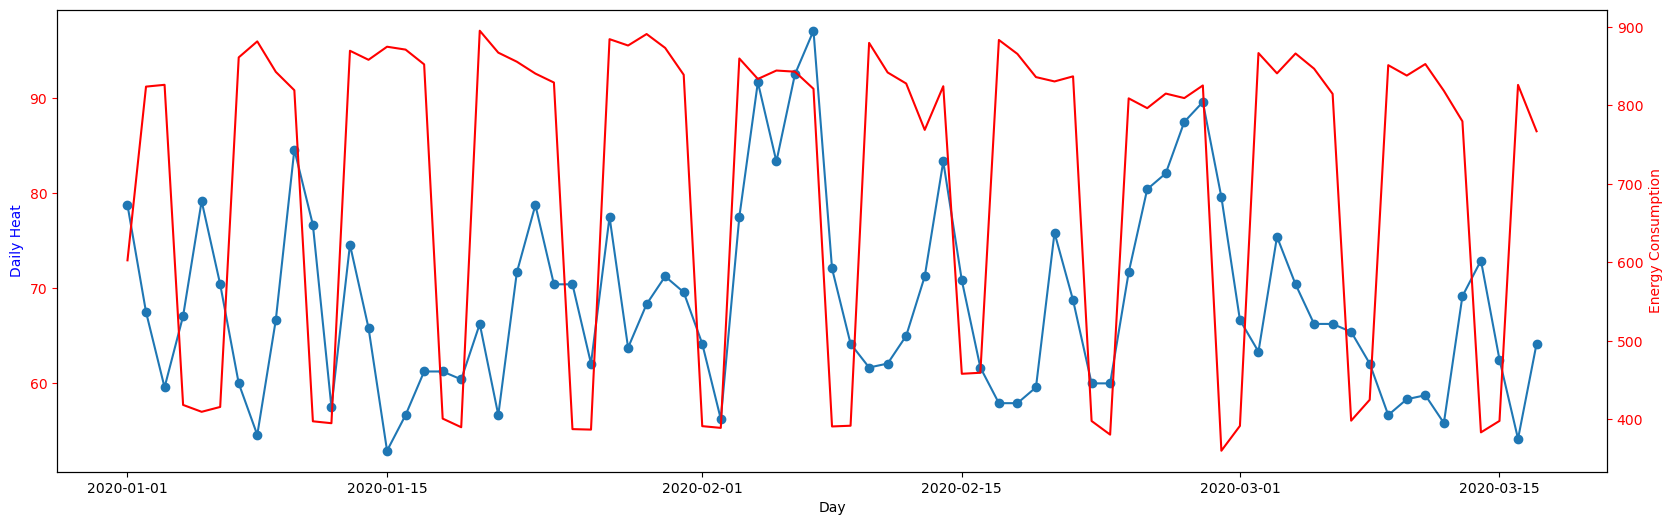

In [39]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(daily_weather.index, daily_weather['Heat'], marker='o')
ax2 = ax1.twinx()
ax2.plot(daily_.index, daily_['ElCons'], color='r')
ax1.set_xlabel('Day')
ax1.set_ylabel('Daily Heat', color='b')
ax1.tick_params('y', colors='r')

ax2.set_ylabel('Energy Consumption', color='r')
ax2.tick_params('y', colors='r')

In [40]:
df.corr(numeric_only=True)['ElCons'].sort_values(key=abs, ascending=False)

ElCons                          1.000000
Weekend                        -0.492355
Heat                            0.375935
Relative humidity (%)          -0.166276
Air temperature (degC)          0.153065
Gust speed (m/s)                0.119594
Wind speed (m/s)                0.114591
Wind direction (deg)            0.043305
Pressure (msl) (hPa)           -0.028451
Dew-point temperature (degC)    0.026777
Horizontal visibility (m)      -0.015798
Cloud amount (1/8)             -0.002236
Name: ElCons, dtype: float64

In [32]:
columns = ['Heat', 'Relative humidity (%)', 'Air temperature (degC)', 'Wind speed (m/s)', 'Weekend', 'Pressure (msl) (hPa)']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

In [34]:
scaler = MinMaxScaler()
scaler.fit_transform(df[columns])

array([[0.3       , 0.86111111, 0.52884615, 0.17094017, 0.        ,
        0.76243981],
       [0.3       , 0.88888889, 0.51923077, 0.17948718, 0.        ,
        0.76083467],
       [0.4       , 0.81944444, 0.59615385, 0.22222222, 0.        ,
        0.75280899],
       ...,
       [0.2       , 0.81944444, 0.84615385, 0.41880342, 0.        ,
        0.77367576],
       [0.1       , 0.81944444, 0.85096154, 0.34188034, 0.        ,
        0.77207063],
       [0.1       , 0.81944444, 0.85576923, 0.36752137, 0.        ,
        0.76725522]])

In [35]:
X = df[columns]
y = df['ElCons']

In [36]:
X.reset_index(inplace=True)

In [37]:
X.drop(['Date'],axis=1, inplace=True)

In [38]:
X.head()

,Heat,Relative humidity (%),Air temperature (degC),Wind speed (m/s),Weekend,Pressure (msl) (hPa)
0,70,90,-1.9,2.0,0,1011.5
1,70,92,-2.1,2.1,0,1011.4
2,80,87,-0.5,2.6,0,1010.9
3,70,83,0.2,2.9,0,1010.7
4,70,84,0.1,3.0,0,1009.9


In [39]:
y = y.values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
xgb_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=xgb_params, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

train_score = best_xgb.score(X_train, y_train)
test_score = best_xgb.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train Score: 0.8958144293555347
Test Score: 0.6441988936471755


In [47]:
cv_scores = cross_val_score(best_xgb, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
print(f"Cross-validation MSE scores: {cv_scores}")
print(f"Mean CV MSE: {cv_scores.mean()}")
y_pred = best_xgb.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mse}')

Cross-validation MSE scores: [-0.51540105 -0.43456848 -0.39875296 -0.30191388 -0.30736296 -0.37184632
 -0.38235758 -0.31250184 -0.33769246 -0.30716144]
Mean CV MSE: -0.36695589691395186
Mean Absolute Error on Test Set: 6.729770400176177


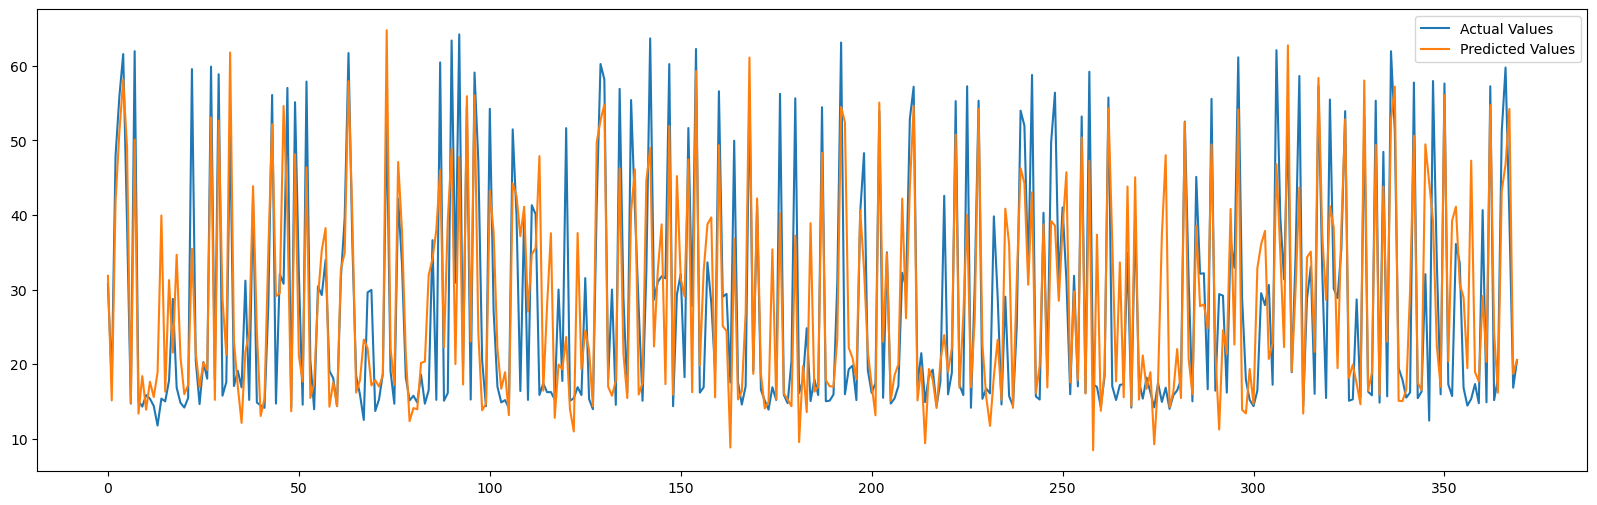

In [60]:
plt.figure(figsize=(20,6))
y_pred = best_xgb.predict(X_test)
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [48]:
import pickle

In [49]:
with open('energy_predict.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

In [51]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)